## This code chooses 3 landmark pixels (from different parts of the landscape) and plots the distances and similarities to those landmarks for least cost, RSPs and random walk.

In [1]:
import sys
sys.path.append('../simulations/')
from grid_manager import *
from habitat_analysis import *
from hdf5_reader import *
data = HDF5Reader(FPATH)
g = data.make_grid()

In [2]:
# np.random.seed(1) # Set random seed to get consistent results
# lmarks = np.random.randint(0,g.N, 3) # Choose 5 random landmarks

lmarks = [3000, 8600, 15500]

In [3]:
L_LC = HabitatAnalysis(g, sampling_method='uniform', \
                       n_landmarks=2, \
                       similarity_measure='least_cost', \
                       affinity_to_cost='paper_choice', \
                       distance_to_similarity='paper_choice')
L_LC.landmarks = lmarks
L_LC.compute_similarities()
d_LC = L_LC.distances_all2L
S_LC = L_LC.similarities_all2L

In [4]:
d_RSPs = []  # List of distances to landmarks
S_RSPs = []  # List of similarities to landmarks
betas = [0.2, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0]
for beta in betas:
    L_RSP = HabitatAnalysis(g, sampling_method='uniform', \
                       n_landmarks=2, \
                       similarity_measure='RSP_dissimilarity', \
                       matrix_computation=False, \
                       beta=beta, \
                       affinity_to_cost='paper_choice')
    L_RSP.landmarks = lmarks
    L_RSP.compute_similarities()
    d_RSPs.append(L_RSP.distances_all2L)
    S_RSPs.append(L_RSP.similarities_all2L)


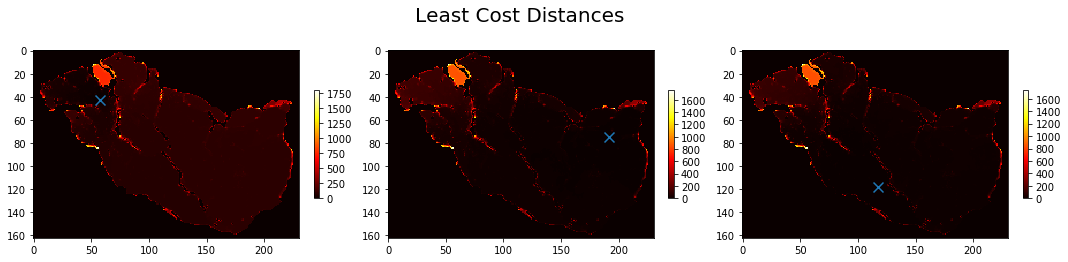

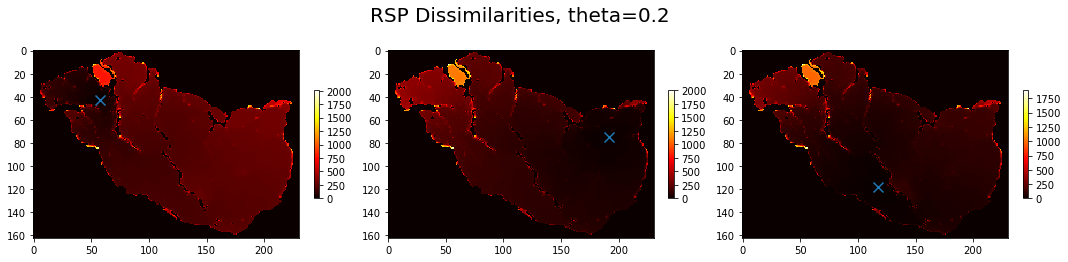

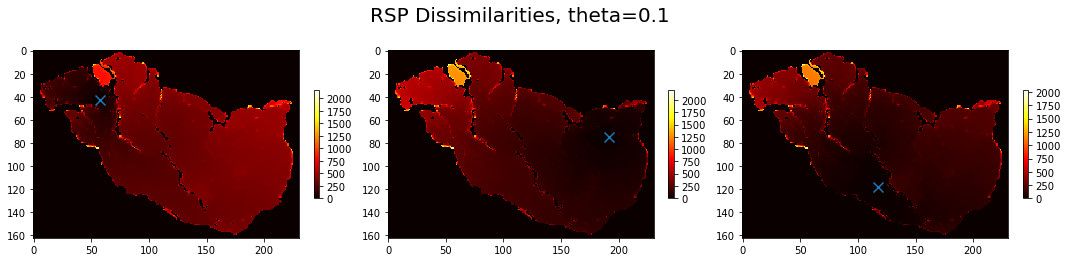

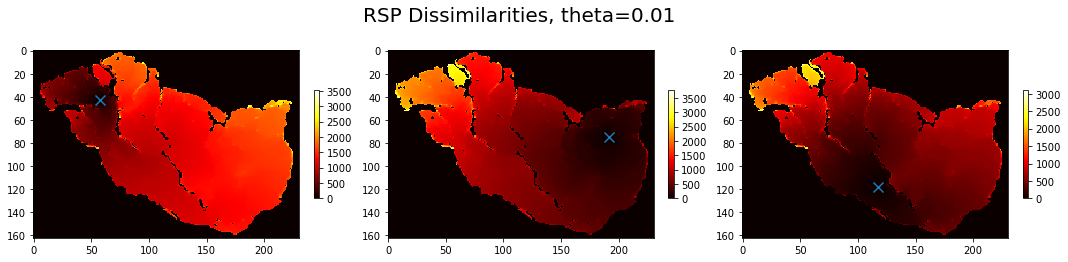

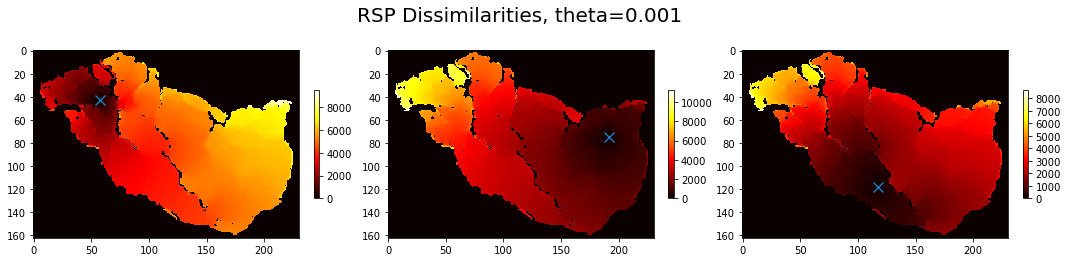

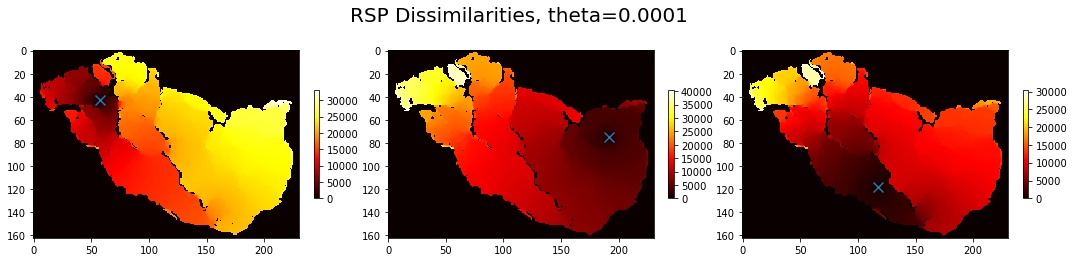

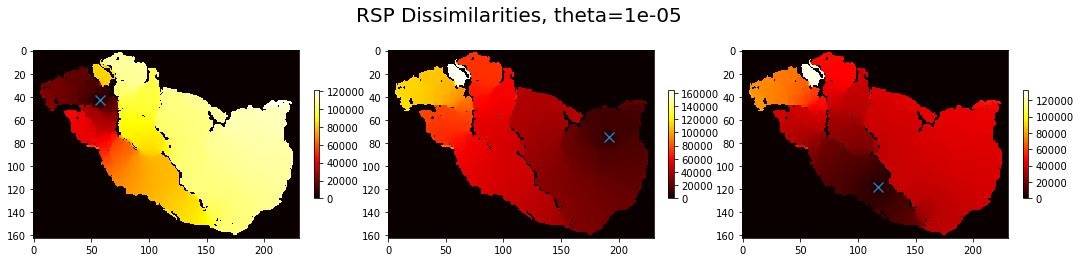

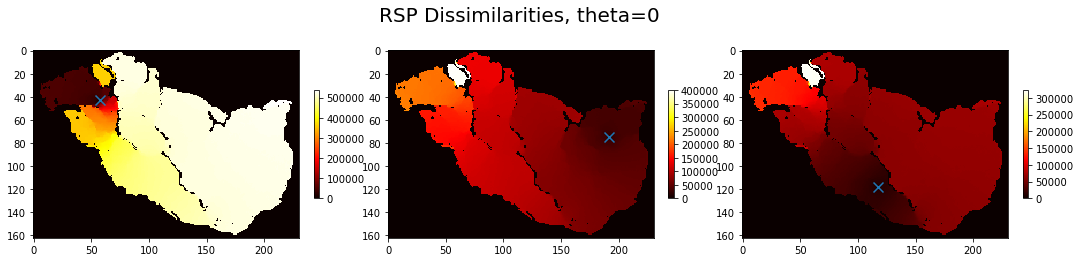

In [5]:
fig, axs = plt.subplots(1,3, figsize=(18,4))
fig.suptitle('Least Cost Distances', fontsize=20)

_ = g.plot(d_LC[:,0], ax=axs[0], source=g.id_to_grid_coordinate_list[lmarks[0]])
_ = g.plot(d_LC[:,1], ax=axs[1], source=g.id_to_grid_coordinate_list[lmarks[1]])
_ = g.plot(d_LC[:,2], ax=axs[2], source=g.id_to_grid_coordinate_list[lmarks[2]])

for beta,d in zip(betas,d_RSPs):
    fig, axs = plt.subplots(1,3, figsize=(18,4))
    fig.suptitle('RSP Dissimilarities, theta={}'.format(beta), fontsize=20)
    _ = g.plot(d[:,0], ax=axs[0], source=g.id_to_grid_coordinate_list[lmarks[0]])
    _ = g.plot(d[:,1], ax=axs[1], source=g.id_to_grid_coordinate_list[lmarks[1]])
    _ = g.plot(d[:,2], ax=axs[2], source=g.id_to_grid_coordinate_list[lmarks[2]])



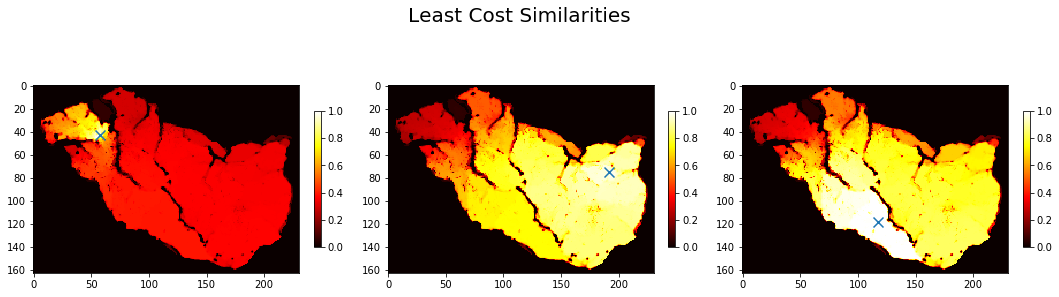

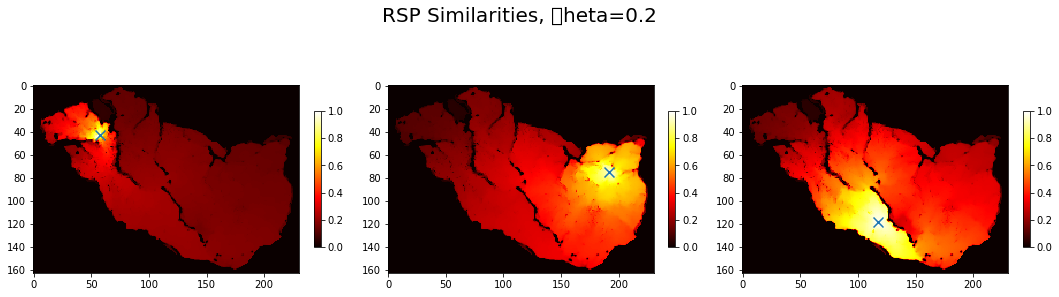

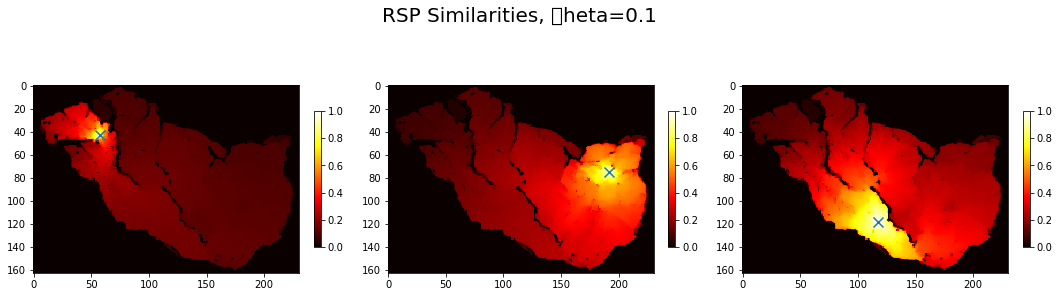

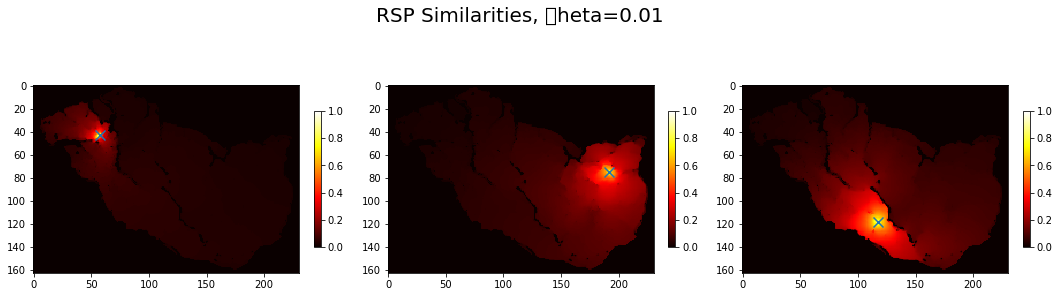

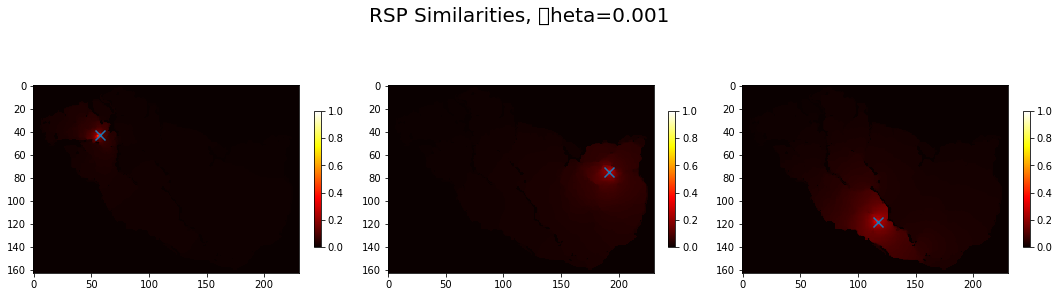

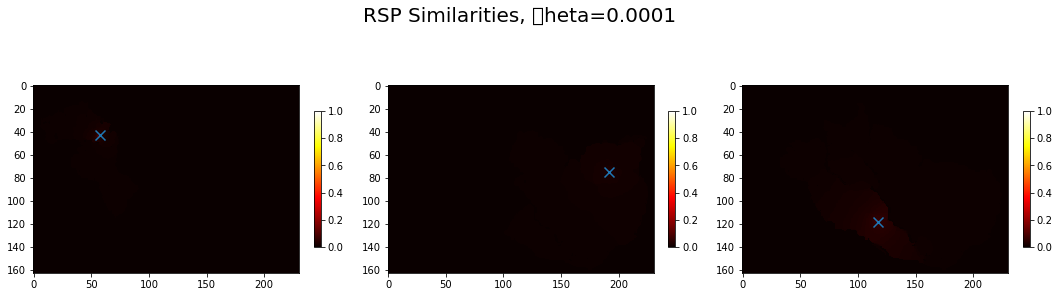

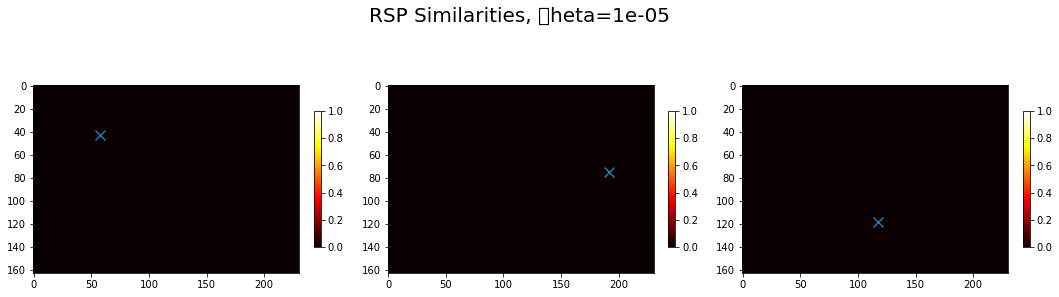

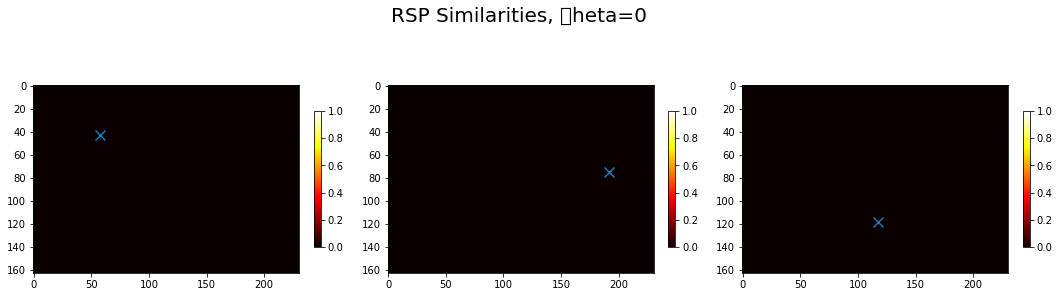

In [6]:
fig, axs = plt.subplots(1,3, figsize=(18,5))
fig.suptitle('Least Cost Similarities', fontsize=20)

_ = g.plot(S_LC[:,0], ax=axs[0], source=g.id_to_grid_coordinate_list[lmarks[0]])
_ = g.plot(S_LC[:,1], ax=axs[1], source=g.id_to_grid_coordinate_list[lmarks[1]])
_ = g.plot(S_LC[:,2], ax=axs[2], source=g.id_to_grid_coordinate_list[lmarks[2]])

for beta,S in zip(betas,S_RSPs):
    fig, axs = plt.subplots(1,3, figsize=(18,5))
    fig.suptitle('RSP Similarities, \theta={}'.format(beta), fontsize=20)
    _ = g.plot(S[:,0], ax=axs[0], source=g.id_to_grid_coordinate_list[lmarks[0]])
    _ = g.plot(S[:,1], ax=axs[1], source=g.id_to_grid_coordinate_list[lmarks[1]])
    _ = g.plot(S[:,2], ax=axs[2], source=g.id_to_grid_coordinate_list[lmarks[2]])

